# Correct Spelling 

***Importing different libraries***
Here we are importing matplotlib library to plot the bar diagram from the data and pandas library to read data from the given excel sheet.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

***Making List***
Defining a list of correct career options that will be used to match and correct the student responses.

In [2]:
options = [
    "Doctor", "Lawyer", "Teacher", "Engineer", "Accountant",
    "Nurse", "Police", "Architect", "Dentist", "Pharmacist"
]

***Taking Input from Excel Sheet(given data)*** 
Using *pandas* library functions we are reading the data from the *"TaskData.xlsx"* and store it in the variable *df*. Note that the excel sheet is stored in the same folder as the python code file. Now another function is used to access the first column of the tabular data inside *df* to a list of data that gives us career responses given by students given in the task sheet.It is now stored inside a list element.


In [3]:
df= pd.read_excel("TaskData.xlsx", header=None)
student_choices = df.iloc[:, 0].tolist()


***Levenshtein Distance Calculation Function***
This function calculates the minimum number of single-character edits like replace, insert and delete to calculate minimum distance between two given strings a and b. If length of b is greater than a we *swap* the position. For *edge case* length of a will be the distance if b is a empty string.

Initialising a row prev_row representing the distances from an empty string to part of string b. Initially, this is simply the indices of b that is range(len(b) +1)

Now start filing matrix by using *loop*. The first loop runs through each character *char1* of string *a*. Start the *curr_row* with the index of *char1* added with 1. It will help to create the new row of the matrix. Then the second loop iterates over the characters *char2* of string *b* and checks the number of operation needed in the three edit methods *insert*, *delete* and *replace*. Variables *replace* stores the number of steps it would take to convert *a* up to *char1* to *b* up to *char2* by substituting a character but if the *char1* and *char2* is same 0 step count added. Next *insert* stores the number of steps it would take to convert *a* up to *char1* to *b* up to *char2* by inserting a character. Last *delete* stores the number of steps it would take to convert *a* up to *char1* to *b* up to *char2* by deleting a character.

Now we have to add the minimum of the three edit method steps to *curr_row* to get the value of that position of the matrix.
Now for next iteration of first loop our *prev_row* becomes our *curr_row*. Thus after completing all the iterations we get diagonal element of the matrix that is the Levenshtein distance for the two strings *a* and *b*.

In [4]:
def levenshtein_distance(a, b):
    if len(a) < len(b):
        return levenshtein_distance(b, a)
    
    if len(b) == 0:
        return len(a)
    
    prev_row = range(len(b) + 1)
    for i, char1 in enumerate(a):
        curr_row = [i + 1]
        for j, char2 in enumerate(b):
            replace = prev_row[j] + (char1 != char2)
            insert = prev_row[j + 1] + 1
            delete = curr_row[j] + 1
            curr_row.append(min(replace, insert, delete))
        prev_row = curr_row
    
    return prev_row[-1]

***Levenshtein Algorithm Explanation Using an Example by the Code***
How this code fills the matrix of words and find the minimum distance of two words here we have explained taking 2 words by calculating Levenshtein distance manually. Let's calculate the minimum distance of "kitten" and "sitting":

Initially the row indices are shown, the words are written in the matrix form. Here for calculation of index we have considered a blank string before each word.

Now replace, insert and delete algorithms of the code are applied in increasing sections of the word taking parts of strings like first as *s* then *si* then *sit* then sitt* and so on and same for the another word. Taking the minimum of these three operations the each row is filled for each character of(i,j) position and the next row is updated using the same. Thus the matrix is filled and shown.

Now the value of the last diagonal element that is the last element of the last row is coming out to be the shortest distance of the whole words. This is the Levenshtein Distance. Here the value is **3**

***Spelling Correction Function***
This function takes the list of given data of responses(with spelling errors) and corrects them by finding with the smallest Levenshtein distance to each option. It makes every charecter in lower case in both response and option to compare. Then it creates a list of corrected responses and retirns it. The *min_dist* stores the minimum distance of one wrong input with the options.

In [5]:
def spelling_correction(inputs):
    corrected_responses = []
    for element in inputs:
        distances = [levenshtein_distance(element.lower(), opt.lower()) for opt in options]
        min_dist = min(distances)
        corrected_responses.append(options[distances.index(min_dist)])
    return corrected_responses

***Spelling Correction of the given data***
We use the spelling_correction function to correct the wrongly spelled inputs in the given data that had been stored in *student_choices* in form of list and stored in a new list.

In [6]:
career_choices = spelling_correction(student_choices)

***Count Frequency of Each Career Option***
We create a dictionary element *career_freq* to count how many times each corrected career choice appears in the list of given responses. We use the *count* function to count the frequency of each string in *options*.

In [7]:
career_freq = {career: career_choices.count(career) for career in options}

***Plotting the bar chart***
Using *matplotlib* library functions we have created the bar chart showing the number of students aspiring a career option.

*plt.figure(figsize=(8, 5))*: Sets the size of the figure.

*plt.bar(career_freq.keys(), career_freq.values(), color='darkviolet')*: Creates the bar chart with the career choices on the x-axis and their frequencies on the y-axis.

*plt.xlabel*, *plt.ylabel* and *plt.title*: Label the axes and the chart.

*plt.xticks(rotation=45)*: Rotates the x-axis labels for better readability.

*plt.show()*: Finally displays the bar chart.

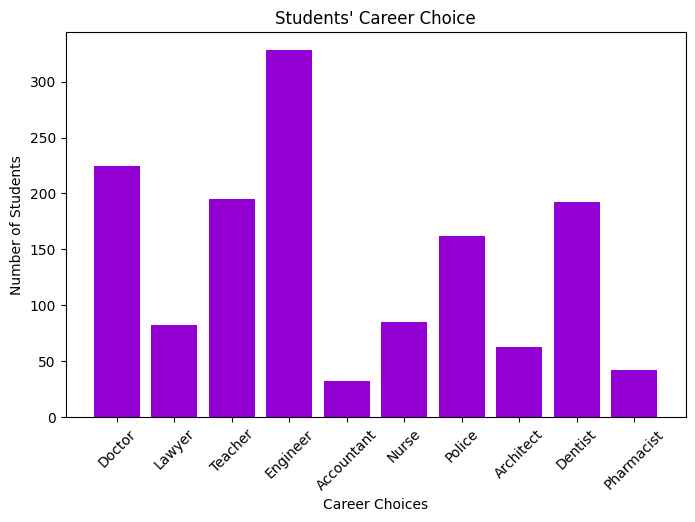

In [8]:
plt.figure(figsize=(8, 5))
plt.bar(career_freq.keys(), career_freq.values(), color='darkviolet')
plt.xlabel('Career Choices')
plt.ylabel('Number of Students')
plt.title('Students\' Career Choice')
plt.xticks(rotation=45)
plt.show()